# Inner join

```python
# Inner join
wards_census = wards.merge(census, on='ward')

# Suffixes
wards_census = wards.merge(census, on='ward', suffixes=('_ward','_cen'))

```

[What column to merge on? | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/data-merging-basics?ex=2)

> ## What column to merge on?
> 
> Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called `taxi_owners`, with info about the taxi cab company owners, and one is called `taxi_veh`, with info about each taxi cab vehicle. Both the `taxi_owners` and `taxi_veh` tables have been loaded for you and you can explore them in the console.
> 
> Choose the column you would use to merge the two tables on using the `.merge()` method.

### init

In [1]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(taxi_owners, taxi_veh)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'taxi_owners.csv': 'https://file.io/nDPC0sh7v6RH',
  'taxi_veh.csv': 'https://file.io/gSFDEk5aK2Bt'}}
"""
prefixToc='1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
taxi_owners = pd.read_csv(prefix+'taxi_owners.csv',index_col=0)
taxi_veh = pd.read_csv(prefix+'taxi_veh.csv',index_col=0)

Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'taxi_owners.csv': 'https://file.io/nDPC0sh7v6RH', 'taxi_veh.csv': 'https://file.io/gSFDEk5aK2Bt'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  205k    0  205k    0     0   251k      0 --:--:-- --:--:-- --:--:--  251k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  181k    0  181k    0     0   230k      0 --:--:-- --:--:-- --:--:--  230k



### code

In [2]:
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [3]:
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


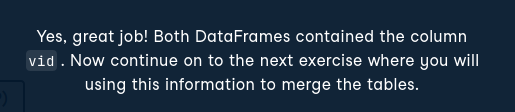

[Your first inner join | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/data-merging-basics?ex=3)

> ## Your first inner join
> 
> You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the `vid` column. You can then use the merged table along with the `.value_counts()` method to find the most common `fuel_type`.
> 
> Since you'll be working with `pandas` throughout the course, the package will be preloaded for you as `pd` in each exercise in this course. Also the `taxi_owners` and `taxi_veh` DataFrames are loaded for you.

> Merge `taxi_owners` with `taxi_veh` on the column `vid`, and save the result to `taxi_own_veh`.

In [4]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


> Set the left and right table suffixes for overlapping columns of the merge to `_own` and `_veh`, respectively.

In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


> Select the `fuel_type` column from `taxi_own_veh` and print the `value_counts()` to find the most popular `fuel_type`s used.

In [6]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


[Inner joins and number of rows returned | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/data-merging-basics?ex=4)

> ## Inner joins and number of rows returned
> 
> All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the `wards` and `census` tables, then comparing it to merges of copies of these tables that are slightly altered, named `wards_altered`, and `census_altered`. The first row of the `wards` column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.
> 
> For this exercise, it is important to know that the `wards` and `census` tables start with **50** rows.

### init

In [8]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(wards, census, wards_altered, census_altered)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'census.csv': 'https://file.io/MNcWvm4b8V08',
  'census_altered.csv': 'https://file.io/WimrG580PZbN',
  'wards.csv': 'https://file.io/0fPooC2LLxdX',
  'wards_altered.csv': 'https://file.io/k6xBpFHTE66Z'}}
"""
prefixToc='1.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
census = pd.read_csv(prefix+'census.csv',index_col=0)
census_altered = pd.read_csv(prefix+'census_altered.csv',index_col=0)
wards = pd.read_csv(prefix+'wards.csv',index_col=0)
wards_altered = pd.read_csv(prefix+'wards_altered.csv',index_col=0)

Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'census.csv': 'https://file.io/MNcWvm4b8V08', 'census_altered.csv': 'https://file.io/WimrG580PZbN', 'wards.csv': 'https://file.io/0fPooC2LLxdX', 'wards_altered.csv': 'https://file.io/k6xBpFHTE66Z'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2896    0  2896    0     0   5125      0 --:--:-- --:--:-- --:--:--  5116

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2895    0  2895    0     0   5778      0 --:--:-- --:--:-- --:--:--  5778

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2799    0  2799    0     0   5052      0 --:--:-- --:--:-- --:--:--  5043

  % Total    % Received % Xfe

### code

> Merge `wards` and `census` on the `ward` column and save the result to `wards_census`.

In [12]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


> Merge the `wards_altered` and `census` tables on the `ward` column, and notice the difference in returned rows.

In [14]:
# Print the first few rows of the wards_altered table to view the change 
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

   ward
0    61
1     2
2     3
3     4
4     5
wards_altered_census table shape: (49, 9)


> Merge the `wards` and `census_altered` tables on the `ward` column, and notice the difference in returned rows.

In [15]:
# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

   ward
0   NaN
1   2.0
2   3.0
3   4.0
4   5.0
wards_census_altered table shape: (49, 9)


# One-to-many relationships

```python

# One-to-many example
ward_licenses = wards.merge(licenses, on='ward', suffixes=('_ward','_lic'))
```

[One-to-many merge | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/data-merging-basics?ex=7)

> ## One-to-many merge
> 
> A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)
> 
> The `licenses` and `biz_owners` DataFrames are loaded for you.

### init

In [16]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(licenses, biz_owners)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'biz_owners.csv': 'https://file.io/LEm54U1fbCXr',
  'licenses.csv': 'https://file.io/zGbz7rxHM3y8'}}
"""
prefixToc='2.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
licenses = pd.read_csv(prefix+'licenses.csv',index_col=0)
biz_owners = pd.read_csv(prefix+'biz_owners.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'biz_owners.csv': 'https://file.io/LEm54U1fbCXr', 'licenses.csv': 'https://file.io/zGbz7rxHM3y8'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  765k    0  765k    0     0   685k      0 --:--:--  0:00:01 --:--:--  685k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  633k    0  633k    0     0   636k      0 --:--:-- --:--:-- --:--:--  636k



### code

> -   Starting with the `licenses` table on the left, merge it to the `biz_owners` table on the column `account`, and save the results to a variable named `licenses_owners`.
> -   Group `licenses_owners` by `title` and count the number of accounts for each title. Save the result as `counted_df`
> -   Sort `counted_df` by the number of **accounts** in **descending order**, and save this as a variable named `sorted_df`.
> -   Use the `.head()` method to print the first few rows of the `sorted_df`.

In [24]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by='account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


# Merging multiple DataFrames

```python
# Single merge
grants.merge(licenses, on=['address','zip'])

# Merging multiple tables
grants_licenses_ward = grants.merge(licenses, on=['address','zip']) \
.merge(wards, on='ward', suffixes=('_bus','_ward'))


# Plot Results
import matplotlib.pyplot as plt
grant_licenses_ward.groupby('ward').agg('sum').plot(kind='bar', y='grant')


```

[Total riders in a month | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/data-merging-basics?ex=9)

> ## Total riders in a month
> 
> Your goal is to find the total number of rides provided to passengers passing through the Wilson station (`station_name == 'Wilson'`) when riding Chicago's public transportation system on weekdays (`day_type == 'Weekday'`) in July (`month == 7`). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is below.
> 
> The `cal`, `ridership`, and `stations` DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

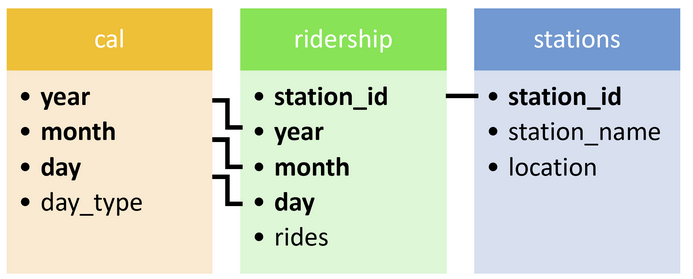

### init

In [25]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(cal, ridership, stations)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'cal.csv': 'https://file.io/sV2qWKB5lia4',
  'ridership.csv': 'https://file.io/SuyVFyM9NFKI',
  'stations.csv': 'https://file.io/yprmeqdfQzjm'}}
"""
prefixToc='3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
cal = pd.read_csv(prefix+'cal.csv',index_col=0)
ridership = pd.read_csv(prefix+'ridership.csv',index_col=0)
stations = pd.read_csv(prefix+'stations.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'cal.csv': 'https://file.io/sV2qWKB5lia4', 'ridership.csv': 'https://file.io/SuyVFyM9NFKI', 'stations.csv': 'https://file.io/yprmeqdfQzjm'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8387    0  8387    0     0  15735      0 --:--:-- --:--:-- --:--:-- 15705

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84120    0 84120    0     0   119k      0 --:--:-- --:--:-- --:--:--  119k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6970    0  6970    0     0  13912      0 --:--:-- --:--:-- --:--:-- 13884



### code

> Merge the `ridership` and `cal` tables together, starting with the `ridership` table on the left and save the result to the variable `ridership_cal`. If you code takes too long to run, your merge conditions might be incorrect.

In [27]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year', 'month', 'day'])

> Extend the previous merge to three tables by also merging the `stations` table.

In [28]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on='station_id')

> Create a variable called `filter_criteria` to select the appropriate rows from the merged table so that you can sum the `rides` column.

In [29]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


[Three table merge | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/data-merging-basics?ex=10)

> ## Three table merge
> 
> To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.
> 
> The `licenses`, `wards`, and `zip_demo` DataFrames have been loaded for you.

### init

In [30]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(licenses, wards,  zip_demo)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'licenses.csv': 'https://file.io/8q3gAmjcxR0V',
  'wards.csv': 'https://file.io/oluS0ogCIIqt',
  'zip_demo.csv': 'https://file.io/3hhCAF6Zhjni'}}
"""
prefixToc='3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
licenses = pd.read_csv(prefix+'licenses.csv',index_col=0)
wards = pd.read_csv(prefix+'wards.csv',index_col=0)
zip_demo = pd.read_csv(prefix+'zip_demo.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'licenses.csv': 'https://file.io/8q3gAmjcxR0V', 'wards.csv': 'https://file.io/oluS0ogCIIqt', 'zip_demo.csv': 'https://file.io/3hhCAF6Zhjni'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  633k    0  633k    0     0   539k      0 --:--:--  0:00:01 --:--:--  539k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2799    0  2799    0     0   5643      0 --:--:-- --:--:-- --:--:--  5643

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1004    0  1004    0     0   2091      0 --:--:-- --:--:-- --:--:--  2087



### code

> -   Starting with the `licenses` table, merge to it the `zip_demo` table on the `zip` column. Then merge the resulting table to the `wards` table on the `ward` column. Save result of the three merged tables to a variable named `licenses_zip_ward`.
> -   Group the results of the three merged tables by the column `alderman` and find the median `income`.

In [31]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                           income
alderman                         
Ameya Pawar                 66246
Anthony A. Beale            38206
Anthony V. Napolitano       82226
Ariel E. Reyboras           41307
Brendan Reilly             110215
Brian Hopkins               87143
Carlos Ramirez-Rosa         66246
Carrie M. Austin            38206
Chris Taliaferro            55566
Daniel "Danny" Solis        41226
David H. Moore              33304
Deborah Mell                66246
Debra L. Silverstein        50554
Derrick G. Curtis           65770
Edward M. Burke             42335
Emma M. Mitts               36283
George Cardenas             33959
Gilbert Villegas            41307
Gregory I. Mitchell         24941
Harry Osterman              45442
Howard B. Brookins, Jr.     33304
James Cappleman             79565
Jason C. Ervin              41226
Joe Moore                   39163
John S. Arena               70122
Leslie A. Hairston          28024
Margaret Laurino            70122
Marty Quinn   

[One-to-many merge with multiple tables | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/data-merging-basics?ex=11)

> ## One-to-many merge with multiple tables
> 
> In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The `land_use` table has info on the percentage of vacant land by city ward. The `census` table has population by ward, and the `licenses` table lists businesses by ward.
> 
> The `land_use`, `census`, and `licenses` tables have been loaded for you.

### init

In [32]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(land_use, census,  licenses)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'census.csv': 'https://file.io/94iW6DJQrR3B',
  'land_use.csv': 'https://file.io/RlvHsPOXd7tS',
  'licenses.csv': 'https://file.io/EG6LkrLrNrNW'}}
"""
prefixToc='3.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
licenses = pd.read_csv(prefix+'licenses.csv',index_col=0)
census = pd.read_csv(prefix+'census.csv',index_col=0)
land_use = pd.read_csv(prefix+'land_use.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'census.csv': 'https://file.io/94iW6DJQrR3B', 'land_use.csv': 'https://file.io/RlvHsPOXd7tS', 'licenses.csv': 'https://file.io/EG6LkrLrNrNW'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2896    0  2896    0     0   5862      0 --:--:-- --:--:-- --:--:--  5850

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   954    0   954    0     0   1198      0 --:--:-- --:--:-- --:--:--  1198

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  633k    0  633k    0     0   620k      0 --:--:--  0:00:01 --:--:--  620k



### code

> Merge `land_use` and `census` on the `ward` column. Merge the result of this with `licenses` on the `ward` column, using the suffix `_cen` for the left table and `_lic` for the right table. Save this to the variable `land_cen_lic`.

In [34]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward').merge(licenses, on='ward', suffixes=['_cen', '_lic'])

> Group `land_cen_lic` by `ward`, `pop_2010` (the population in 2010), and `vacant`, then count the number of `accounts`. Save the results to `pop_vac_lic`.

In [35]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], 
                                   as_index=False).agg({'account':'count'})

> Sort `pop_vac_lic` by `vacant`, `account`, and`pop_2010` in descending, ascending, and ascending order respectively. Save it as `sorted_pop_vac_lic`.

In [36]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

    ward  pop_2010  vacant  account
6      7     51581      19       80
19    20     52372      15      123
9     10     51535      14      130
23    24     54909      13       98
15    16     51954      13      156
